# Answer Key
1. **What is the owner occupied rate?**

2. **How has the owner occupied rate changed over time?**

3. **What is the occupancy distribution by age?**

4. **What is the occupancy distribution by race?**

5. **What is the occupancy distribution by gender?**

In [1]:
import os
import pandas as pd
from pathlib import Path, PosixPath
from typing import NamedTuple

In [2]:
pd.set_option("display.max_columns", None)  # display all columns
pd.set_option("float_format", "{:,.2f}".format)  # display floats with commas and two decimal places

In [3]:
# NamedTuple type hint
class ParametersType(NamedTuple):
    acs_path: PosixPath # Platform neutral pathlib PosixPath to ACS data
    openai_api_key: str # OpenAI API key

In [4]:
Parameters: ParametersType = ParametersType(
    acs_path = Path("./Data/ACS_2012_21.csv"),
    openai_api_key = os.environ["OPENAI_API_KEY"]
)

# ACS Data

In [5]:
acs_df: pd.DataFrame = pd.read_csv(Parameters.acs_path)
acs_df.drop(columns=["Unnamed: 0"], inplace=True)
display(acs_df.info())
display(acs_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 95 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Geography                                                     520 non-null    object 
 1   Geographic Area Name                                          520 non-null    object 
 2   Total population                                              520 non-null    int64  
 3   Male                                                          520 non-null    int64  
 4   Female                                                        520 non-null    int64  
 5   Under 5 years                                                 520 non-null    int64  
 6   5 to 9 years                                                  520 non-null    int64  
 7   10 to 14 years                                                520 non-n

None

,Geography,Geographic Area Name,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years),18 years and over,21 years and over,65 years and over,One race,Two or more races,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,Hispanic or Latino (of any race),Not Hispanic or Latino,Total housing units_x,YEAR,Total households,Households with one or more people under 18 years,Households with one or more people 65 years and over,Average household size,Males 15 years and over,"Never married, Males 15 years and over","Now married, except separated, Males 15 years and over","Separated, Males 15 years and over","Widowed, Males 15 years and over","Divorced, Males 15 years and over",Females 15 years and over,"Never married, Females 15 years and over","Now married, except separated, Females 15 years and over","Separated, Females 15 years and over","Widowed, Females 15 years and over","Divorced, Females 15 years and over",Population 3 years and over enrolled in school,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,Native,Foreign born,Language other than English,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Civilian employed population 16 years and over,"Management, business, science, and arts occupations",Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Median family income (dollars),Mean family income (dollars),Per capita income (dollars),Civilian noninstitutionalized population,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,Total housing units_y,Occupied housing units,Vacant housing units,Homeowner vacancy rate,Rental vacancy rate,Median rooms,"Median (dollars), Value",Owner-occupied units,Housing units with a mortgage,Housing units without a mortgage,"Median (dollars), Rent",No rent paid
0,0400000US01,Alabama,4777326,2317520,2459806,305091,309360,318484,337159,340808,607797,619112,686672,310336,279202,374441,211411,77453,37.80,3647097,3433673,663305,4710487,66839,3379235,1285740,57219,66512,2901,56469,182268,4595058,2172647,2012,"1,837,576.00","597,337.00","475,330.00",2.54,"1,841,356.00","584,355.00","957,174.00","39,467.00","52,899.00","207,461.00","2,003,035.00","517,693.00","937,087.00","61,290.00","222,434.00","264,531.00","1,220,805.00","3,166,424.00","187,882.00","363,148.00","991,406.00","691,686.00","227,301.00","448,117.00","256,884.00","4,610,592.00","166,734.00","230,806.00",3779457,2265008,2248665,2017887,230778,16343,1514449,2017887,643951,332351,507206,218389,315990,54326,70237,23587,4693822,4039446,3112613,1524117,654376,2172647,1837576,335071,2.50,9.00,5.70,122300,1289324,776946,512378,691,63064
1,0400000US01,Alabama,4817678,2336020,2481658,299571,304412,321104,327579,347110,618482,610792,675347,322017,292003,401417,217634,80210,38.20,3699760,3491373,699261,4741250,76428,3393927,1304167,58134,72528,3737,65898,191838,4625840,2190638,2013,"1,838,683.00","592,093.00","486,161.00",2.55,"1,854,423.00","596,005.00","952,726.00","40,229.00","54,972.00","210,491.00","2,016,442.00","530,755.00","932,261.00","61,058.00","222,995.00","269,373.00","1,222,995.00","3,193,338.00","180,671.00","358,529.00","991,730.00","703,243.00","236,473.00","458,393.00","264,299.00","4,631,045.00","168,232.00","235,741.00",3806434,2259344,2244093,2002163,241930,15251,1547090,2002163,652201,335865,494371,209494,310232,54362,70661,23680,4716915,4061521,3093955,1568842,

In [6]:
acs_df.YEAR.describe()

count     520.00
mean    2,016.50
std         2.88
min     2,012.00
25%     2,014.00
50%     2,016.50
75%     2,019.00
max     2,021.00
Name: YEAR, dtype: float64

1. **What is the owner occupied rate?**

<span style="color:brown">Code was generated by Github Copilot</span>

In [7]:
# Owner occupied rate
acs_df["Owner occupied rate"] = acs_df["Owner-occupied units"] / acs_df["Occupied housing units"]
owner_occupied_features: list = [
    "Geographic Area Name",
    "YEAR",
    "Occupied housing units",
    "Owner-occupied units",
    "Owner occupied rate",
]
display(acs_df[owner_occupied_features].head())

,Geographic Area Name,YEAR,Occupied housing units,Owner-occupied units,Owner occupied rate
0,Alabama,2012,1837576,1289324,0.70
1,Alabama,2013,1838683,1281604,0.70
2,Alabama,2014,1842174,1274196,0.69
3,Alabama,2015,1848325,1269145,0.69
4,Alabama,2016,1851061,1267824,0.68


count   520.00
mean      0.66
std       0.05
min       0.41
25%       0.64
50%       0.67
75%       0.69
max       0.74
Name: Owner occupied rate, dtype: float64

<Axes: >

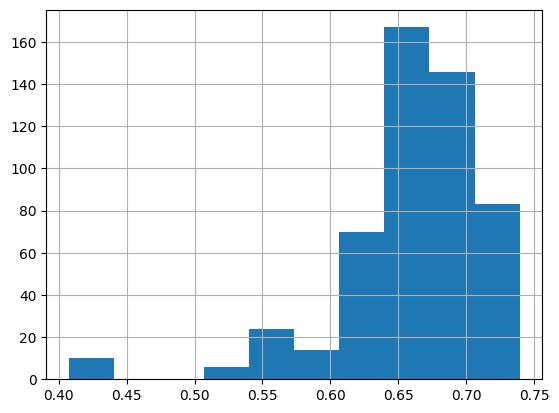

In [8]:
display(acs_df["Owner occupied rate"].describe())
display(acs_df["Owner occupied rate"].hist())

In [9]:
# Unit test for owner occupied rate
assert acs_df["Owner occupied rate"].describe()["min"] > 0


In [10]:
# Unit test for owner occupied rate
assert acs_df["Owner occupied rate"].describe()["max"] < 1

In [11]:
# Owner occupied rate check
assert acs_df[owner_occupied_features].iloc[0][3] / acs_df[owner_occupied_features].iloc[0][2] - acs_df[owner_occupied_features].iloc[0][4] == 0

2. **How has the owner occupied rate changed over time?**

<span style="color:brown">Code was generated by Github Copilot</span>

In [12]:
# How has the owner occupied rate changed over time?
acs_df.groupby("YEAR")["Owner occupied rate"].mean()

YEAR
2012   0.67
2013   0.67
2014   0.66
2015   0.66
2016   0.65
2017   0.66
2018   0.66
2019   0.66
2020   0.66
2021   0.66
Name: Owner occupied rate, dtype: float64

<Axes: xlabel='YEAR'>

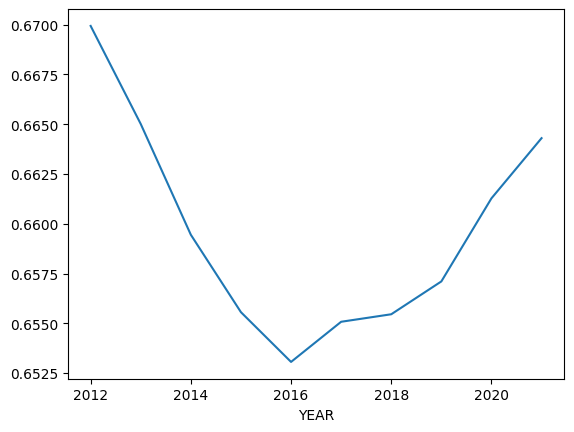

In [13]:
# Plot of owner occupied rate over time
acs_df.groupby("YEAR")["Owner occupied rate"].mean().plot()

<span style="color:brown">Code was generated by Github Copilot</span>

In [14]:
# By state, how has the owner occupied rate changed over time?
acs_df.groupby(["Geographic Area Name", "YEAR"])["Owner occupied rate"].mean()

Geographic Area Name  YEAR
Alabama               2012   0.70
                      2013   0.70
                      2014   0.69
                      2015   0.69
                      2016   0.68
                             ... 
Wyoming               2017   0.69
                      2018   0.69
                      2019   0.70
                      2020   0.71
                      2021   0.72
Name: Owner occupied rate, Length: 520, dtype: float64

Not right

<Axes: xlabel='Geographic Area Name'>

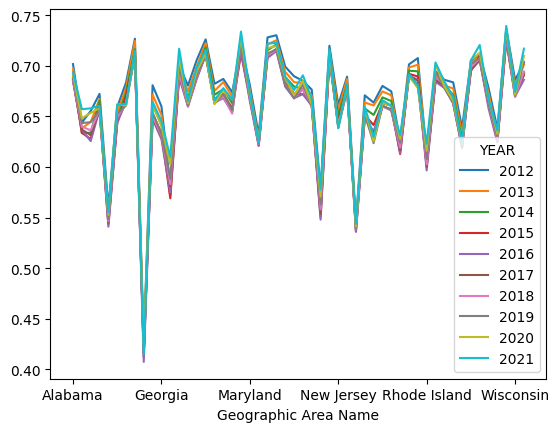

In [15]:
# Plot of state level owner occupied rate over time
acs_df.groupby(["Geographic Area Name", "YEAR"])["Owner occupied rate"].mean().unstack().plot()

Ugly, but right

<Axes: xlabel='YEAR'>

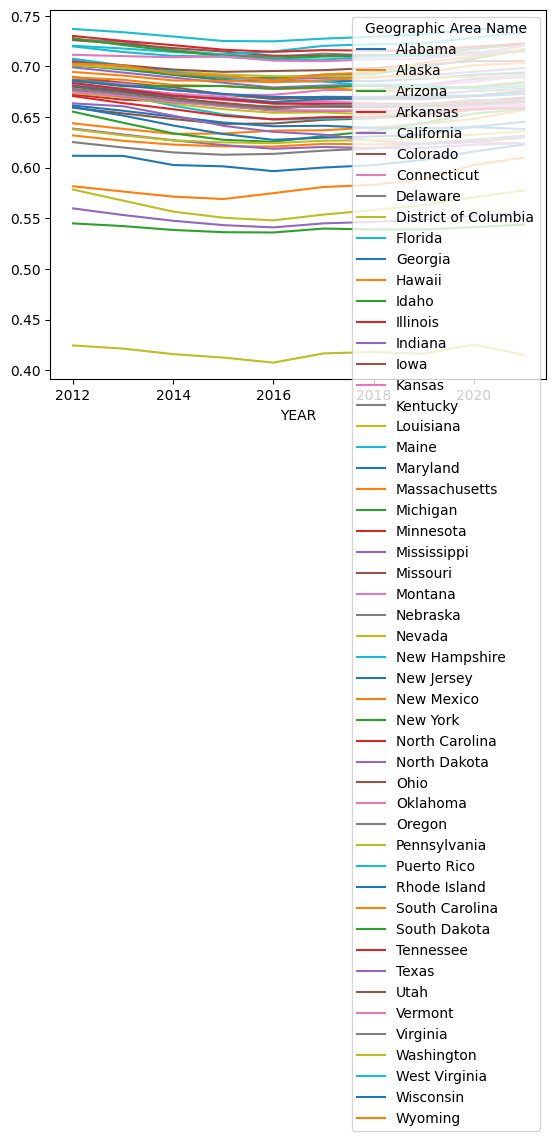

In [16]:
# Plot of owner occupied rate over time by state
acs_df.groupby(["YEAR", "Geographic Area Name"])["Owner occupied rate"].mean().unstack().plot()

In [17]:
# Unique states
acs_df["Geographic Area Name"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Wierd/Wrong

<Axes: xlabel='Geographic Area Name'>

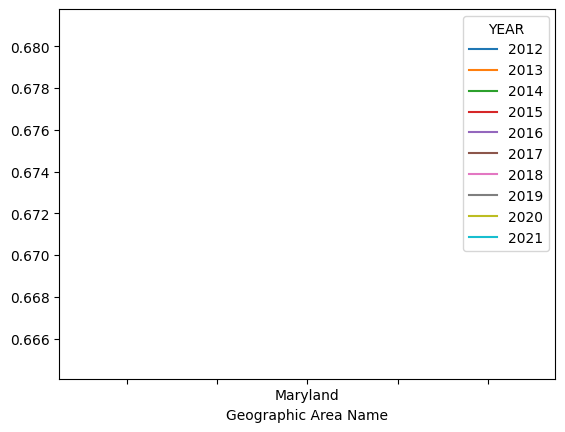

In [18]:
# Plot of Maryland owner occupied rate over time
acs_df[acs_df["Geographic Area Name"] == "Maryland"].groupby(["Geographic Area Name", "YEAR"])["Owner occupied rate"].mean().unstack().plot()

<Axes: xlabel='YEAR'>

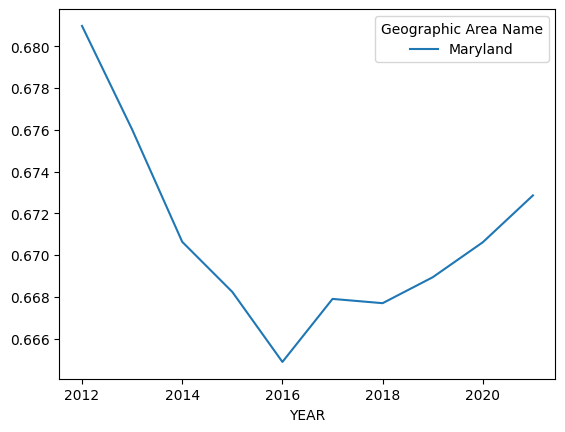

In [19]:
# Plot of owner occupied rate over time for Maryland
acs_df[acs_df["Geographic Area Name"] == "Maryland"].groupby(["YEAR", "Geographic Area Name"])["Owner occupied rate"].mean().unstack().plot()

3. **What is the occupancy distribution by age?**

Created the following age feature list before Copilot generated the code.

In [20]:
age_features: list = [
    c for c in acs_df.columns.tolist()
    if c.find("years") > -1 and (c[0].isdigit() or c.find("Under") > -1)
]
age_features

['Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 '18 years and over',
 '21 years and over',
 '65 years and over']

<span style="color:brown">Code was generated by Github Copilot</span>

Sort of right.

In [21]:
# Occupancy distribution by age, state, and year
acs_df.groupby(["Geographic Area Name", "YEAR"])[age_features].sum()

Under 5 years  5 to 9 years  10 to 14 years  \
Geographic Area Name YEAR                                                
Alabama              2012         305091        309360          318484   
                     2013         299571        304412          321104   
                     2014         301925        306456          320031   
                     2015         292771        305707          313980   
                     2016         295054        305714          318437   
...                                  ...           ...             ...   
Wyoming              2017          37270         39680           38940   
                     2018          37457         40669           38297   
                     2019          36541         39162           38772   
                     2020          35436         38926           38556   
                     2021          34262         37814           39782   

                           15 to 19 years  20 to 24 years  25 to 34 years  \
Geographic Area Name YEAR                                                   
Alabama              2012          337159          340808          607797   
                     2013          327579          347110          618482   
                     2014          332287          345240          612596   
                     2015          324809          342489          626564   
                     2016          324020          348044          621592   
...                                   ...             ...             ...   
Wyoming              2017           36734           39921           80389   
                     2018           36824           41336           81398   
                     2019           36721           39312           79874   
                     2020           36630           38981           78548   
                     2021           37649           36972           75736   

                           35 to 44 years  45 to 54 years  55 to 59 years  \
Geographic Area Name YEAR                                                   
Alabama              2012          619112          686672          310336   
                     2013          610792          675347          322017   
                     2014          615375          681953          316960   
                     2015          606216          656639          332234   
                     2016          609415          665372          326349   
...                                   ...             ...             ...   
Wyoming              2017           71531           68957           40523   
                     2018           71088           70920           41627   
                     2019           71806           67571           40283   
                     2020           73356           66350           39328   
                     2021           74849           65218           38554   

                           60 to 64 years  65 to 74 years  75 to 84 years  \
Geographic Area Name YEAR                                                   
Alabama              2012          279202          374441          211411   
                     2013          292003          401417          217634   
                     2014          285880          387589          214771   
                     2015          297361          434510          225663   
                     2016          297297          416983          220721   
...                                   ...             ...             ...   
Wyoming              2017           40114           52876           25287   
                     2018           39345           50406           24025   
                     2019           39520           55440           26118   
                     2020           39671           58514           27054   
                     2021           39265           60497           26240   

                           85 years and over  18 years and

<span style="color:brown">Code was generated by Github Copilot</span>

Better comment.

In [22]:
# Occupancy distribution by age, state, and year expressed as a percentage
occ_age_df = acs_df.groupby(["Geographic Area Name", "YEAR"])[age_features].sum().apply(lambda x: x / x.sum(), axis=1)
occ_age_df

Under 5 years  5 to 9 years  10 to 14 years  \
Geographic Area Name YEAR                                                
Alabama              2012           0.02          0.02            0.03   
                     2013           0.02          0.02            0.03   
                     2014           0.02          0.02            0.03   
                     2015           0.02          0.02            0.02   
                     2016           0.02          0.02            0.02   
...                                  ...           ...             ...   
Wyoming              2017           0.02          0.03            0.03   
                     2018           0.02          0.03            0.02   
                     2019           0.02          0.03            0.03   
                     2020           0.02          0.03            0.02   
                     2021           0.02          0.02            0.03   

                           15 to 19 years  20 to 24 years  25 to 34 years  \
Geographic Area Name YEAR                                                   
Alabama              2012            0.03            0.03            0.05   
                     2013            0.03            0.03            0.05   
                     2014            0.03            0.03            0.05   
                     2015            0.03            0.03            0.05   
                     2016            0.03            0.03            0.05   
...                                   ...             ...             ...   
Wyoming              2017            0.02            0.03            0.05   
                     2018            0.02            0.03            0.05   
                     2019            0.02            0.03            0.05   
                     2020            0.02            0.03            0.05   
                     2021            0.02            0.02            0.05   

                           35 to 44 years  45 to 54 years  55 to 59 years  \
Geographic Area Name YEAR                                                   
Alabama              2012            0.05            0.05            0.02   
                     2013            0.05            0.05            0.03   
                     2014            0.05            0.05            0.03   
                     2015            0.05            0.05            0.03   
                     2016            0.05            0.05            0.03   
...                                   ...             ...             ...   
Wyoming              2017            0.05            0.04            0.03   
                     2018            0.05            0.05            0.03   
                     2019            0.05            0.04            0.03   
                     2020            0.05            0.04            0.03   
                     2021            0.05            0.04            0.03   

                           60 to 64 years  65 to 74 years  75 to 84 years  \
Geographic Area Name YEAR                                                   
Alabama              2012            0.02            0.03            0.02   
                     2013            0.02            0.03            0.02   
                     2014            0.02            0.03            0.02   
                     2015            0.02            0.03            0.02   
                     2016            0.02            0.03            0.02   
...                                   ...             ...             ...   
Wyoming              2017            0.03            0.03            0.02   
                     2018            0.03            0.03            0.02   
                     2019            0.03            0.04            0.02   
                     2020            0.03            0.04            0.02   
                     2021            0.03            0.04            0.02   

                           85 years and over  18 years and

In [23]:
# Check occupancy distribution by age, state, and year expressed as a percentage
assert occ_age_df.sum(axis=1).max().round(6) == 1.0


In [24]:
# Check occupancy distribution by age, state, and year expressed as a percentage
assert occ_age_df.sum(axis=1).min().round(6) == 1.0

<span style="color:red">Error - Code was generated by Github Copilot</span>

Modified Copilot code

<Axes: xlabel='YEAR'>

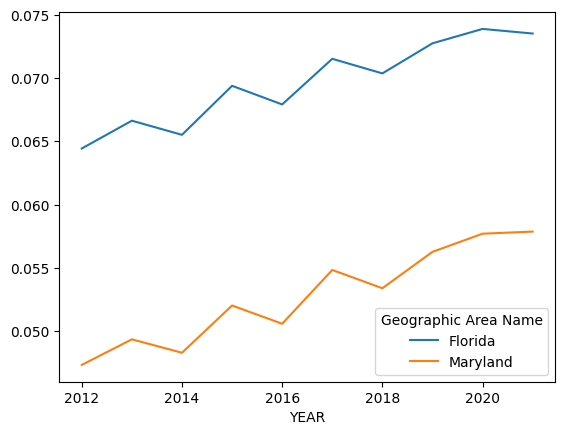

In [25]:
# Plot occupancy distribution for 65 years and over by year for Maryland and Florida
acs_df[
    (acs_df["Geographic Area Name"].isin(["Maryland", "Florida"]))
].groupby(["YEAR", "Geographic Area Name",])[age_features].sum().apply(lambda x: x / x.sum(), axis=1)["65 years and over"].unstack().plot()

4. **What is the occupancy distribution by race?**

In [26]:
race_features: list = [
    "White",
    "Black or African American",
    "American Indian and Alaska Native",
    "Asian",
    "Native Hawaiian and Other Pacific Islander",
    "Some other race",
    "Hispanic or Latino (of any race)",
    "Not Hispanic or Latino",
]

In [27]:
# Occupancy distribution by race, state, and year expressed as a percentage
occ_race_df = acs_df.groupby(["Geographic Area Name", "YEAR"])[race_features].sum().apply(lambda x: x / x.sum(), axis=1)
occ_race_df

White  Black or African American  \
Geographic Area Name YEAR                                     
Alabama              2012   0.35                       0.13   
                     2013   0.35                       0.13   
                     2014   0.35                       0.13   
                     2015   0.35                       0.14   
                     2016   0.35                       0.13   
...                          ...                        ...   
Wyoming              2017   0.46                       0.01   
                     2018   0.46                       0.01   
                     2019   0.46                       0.01   
                     2020   0.46                       0.01   
                     2021   0.46                       0.01   

                           American Indian and Alaska Native  Asian  \
Geographic Area Name YEAR                                             
Alabama              2012                               0.01   0.01   
                     2013                               0.01   0.01   
                     2014                               0.01   0.01   
                     2015                               0.01   0.01   
                     2016                               0.01   0.01   
...                                                      ...    ...   
Wyoming              2017                               0.02   0.01   
                     2018                               0.02   0.01   
                     2019                               0.02   0.01   
                     2020                               0.02   0.01   
                     2021                               0.02   0.01   

                           Native Hawaiian and Other Pacific Islander  \
Geographic Area Name YEAR                                               
Alabama              2012                                        0.00   
                     2013                                        0.00   
                     2014                                        0.00   
                     2015                                        0.00   
                     2016                                        0.00   
...                                                               ...   
Wyoming              2017                                        0.00   
                     2018                                        0.00   
                     2019                                        0.00   
                     2020                                        0.00   
                     2021                                        0.00   

                           Some other race  Hispanic or Latino (of any race)  \
Geographic Area Name YEAR                                                      
Alabama              2012             0.01                              0.02   
                     2013             0.01                              0.02   
                     2014             0.01                              0.02   
                     2015             0.01                              0.02   
                     2016             0.01                              0.02   
...                                    ...                               ...   
Wyoming              2017             0.01                              0.05   
                     2018             0.01                              0.05   
                     2019             0.01                              0.05   
                     2020             0.01                              0.05   
                     2021             0.02                              0.05   

                           Not Hispanic or Latino  
Geographic Area Name YEAR                          
Alabama              2012                    0.48  
                     2013                    0.48  
                     2014                    0.48  
                     2015       

<Axes: xlabel='YEAR'>

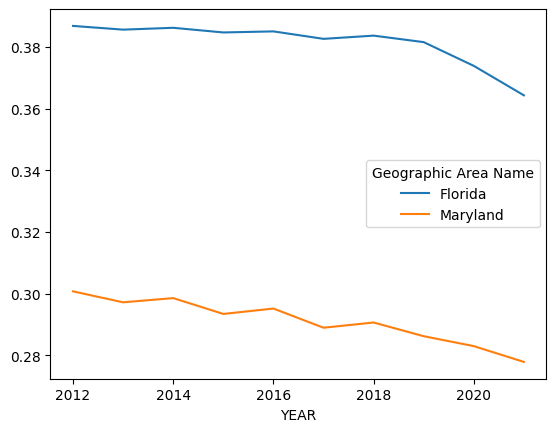

In [28]:
# Plot occupancy distribution for White by year for Maryland and Florida
acs_df[
    (acs_df["Geographic Area Name"].isin(["Maryland", "Florida"]))
].groupby(["YEAR", "Geographic Area Name",])[race_features].sum().apply(lambda x: x / x.sum(), axis=1)["White"].unstack().plot()

In [29]:
acs_df[
    (acs_df["Geographic Area Name"].isin(["Maryland", "Florida"]))
].groupby(["Geographic Area Name", "YEAR"])[race_features].sum().apply(lambda x: x / x.sum(), axis=1)

White  Black or African American  \
Geographic Area Name YEAR                                     
Florida              2012   0.39                       0.08   
                     2013   0.39                       0.09   
                     2014   0.39                       0.08   
                     2015   0.38                       0.09   
                     2016   0.39                       0.09   
                     2017   0.38                       0.09   
                     2018   0.38                       0.09   
                     2019   0.38                       0.09   
                     2020   0.37                       0.09   
                     2021   0.36                       0.08   
Maryland             2012   0.30                       0.15   
                     2013   0.30                       0.15   
                     2014   0.30                       0.15   
                     2015   0.29                       0.15   
                     2016   0.30                       0.15   
                     2017   0.29                       0.16   
                     2018   0.29                       0.15   
                     2019   0.29                       0.16   
                     2020   0.28                       0.16   
                     2021   0.28                       0.16   

                           American Indian and Alaska Native  Asian  \
Geographic Area Name YEAR                                             
Florida              2012                               0.00   0.01   
                     2013                               0.00   0.02   
                     2014                               0.00   0.02   
                     2015                               0.00   0.02   
                     2016                               0.00   0.02   
                     2017                               0.00   0.02   
                     2018                               0.00   0.02   
                     2019                               0.00   0.02   
                     2020                               0.00   0.02   
                     2021                               0.00   0.02   
Maryland             2012                               0.00   0.03   
                     2013                               0.00   0.03   
                     2014                               0.00   0.03   
                     2015                               0.01   0.04   
                     2016                               0.00   0.03   
                     2017                               0.01   0.04   
                     2018                               0.01   0.04   
                     2019                               0.01   0.04   
                     2020                               0.01   0.04   
                     2021                               0.01   0.04   

                           Native Hawaiian and Other Pacific Islander  \
Geographic Area Name YEAR                                               
Florida              2012                                        0.00   
                     2013                                        0.00   
                     2014                                        0.00   
                     2015                                        0.00   
                     2016                                        0.00   
                     2017                                        0.00   
                     2018                                        0.00   
                     2019                                        0.00   
                     2020                                        0.00   
                     2021                                        0.00   
Maryland             2012                                        0.00   
                     2013                                        0.00   
                     2014                              

In [30]:
# Check occupancy distribution by race, state, and year expressed as a percentage
assert occ_race_df.sum(axis=1).max().round(6) == 1.0

In [31]:
# Check occupancy distribution by race, state, and year expressed as a percentage
assert occ_race_df.sum(axis=1).min().round(6) == 1.0

5. **What is the occupancy distribution by gender?**

In [32]:
gender_features: list = [
    "Male",
    "Female",
]

In [33]:
# Occupancy distribution by gender, state, and year expressed as a percentage
occ_gender_df = acs_df.groupby(["Geographic Area Name", "YEAR"])[gender_features].sum().apply(lambda x: x / x.sum(), axis=1)
occ_gender_df

Male  Female
Geographic Area Name YEAR              
Alabama              2012  0.49    0.51
                     2013  0.48    0.52
                     2014  0.49    0.51
                     2015  0.48    0.52
                     2016  0.48    0.52
...                         ...     ...
Wyoming              2017  0.51    0.49
                     2018  0.51    0.49
                     2019  0.51    0.49
                     2020  0.51    0.49
                     2021  0.51    0.49

[520 rows x 2 columns]

<Axes: xlabel='YEAR'>

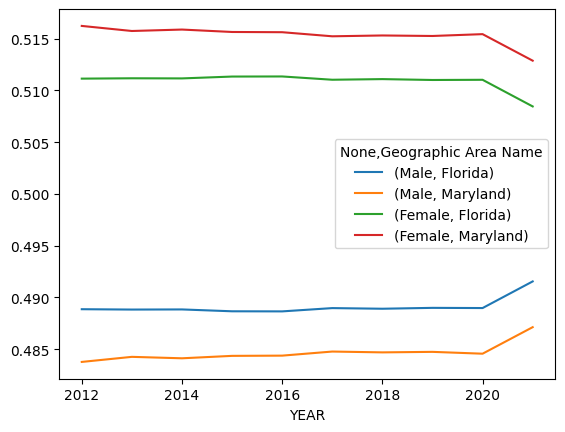

In [34]:
# Gender occupancy distribution by year for Maryland and Florida
acs_df[
    (acs_df["Geographic Area Name"].isin(["Maryland", "Florida"]))
].groupby(["YEAR", "Geographic Area Name",])[gender_features].sum().apply(lambda x: x / x.sum(), axis=1).unstack().plot()

In [35]:
# Check occupancy distribution by gender, state, and year expressed as a percentage
assert occ_gender_df.sum(axis=1).max().round(6) == 1.0

In [36]:
# Check occupancy distribution by gender, state, and year expressed as a percentage
assert occ_gender_df.sum(axis=1).min().round(6) == 1.0